# Vente de voitures

L'industrie automobile est un secteur d'activité economique traditionellement fort en France. La France se place au troisième rang des pays européens pour le nombre d'immatriculations de voitures neuves et plus de la moitié de ces immatriculations concernent des voitures de marque francaises (PSA Peugeot Citroen & Renault).
Curieusement, les ventes de véhicules sont corrélés à la consommation privée et sont a ce titre un bon indicateur de l'acivitée économique du pays.

## 1. Les voitures les plus vendues en France

Nous avons récupéré un jeu de données des voitures les plus vendues en France sur les années 2008 à 2015. Ces données sont disponibles [ici](http://www.fiches-auto.fr/articles-auto/l-auto-en-chiffres/s-651-voitures-les-plus-vendues-en-france.php).
Par commodité, nous avons collecté ces données dans un fichier Excel qui peut être chargé directement (`best_selling_models.xlsx`).

In [1]:
import pandas as pd
#import des feuille excel dans une dataframe
ventes = pd.read_excel("E:/notebooks/best_selling_models.xlsx", 
                       sheetname=["2015","2014","2013","2012","2011", "2010","2009","2008"])


### Exercice 1: Data Viz

** 1.1 Combien d'unitées de voitures sont vendues chaque année ? **


In [2]:
%matplotlib inline
import unicodedata
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import cm 
from datetime import datetime
import numpy as np

#Ajout d'un colonne année
for year in range(2008,2016):
    ventes[str(year)]['annee'] = int(year)

#regroupement des différentes années en une seul dataframe
df = pd.concat(ventes)
df.index = range(len(df))

#élimination des caractère accentués ey conversion de date
df.modele = [unicodedata.normalize('NFKD',x).strip().encode('ASCII','ignore') for x in df.modele]
df.annee = [datetime.strptime(str(x), '%Y') for x in df.annee]


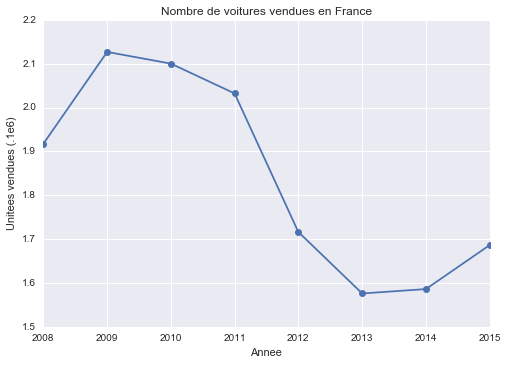

In [3]:
##
# Combien d'unités vendues chaque années?
##

total_unite_vendues = df.groupby('annee', as_index=False).sum()
plt.plot(total_unite_vendues.annee, total_unite_vendues.vente/1e6, '-o')
plt.ylabel('Unitees vendues (.1e6)')
plt.xlabel('Annee')
plt.title('Nombre de voitures vendues en France')
plt.show()

**Comment expliquer cette baisse de ventes à partir de 2011?**

- L'année 2011 est marquée par la fin de **la prime à la casse** qui était conçu pour augmenter les ventes de voitures plus propres et sortir de la circulation les voitures les plus polluantes.
- Une diminution du PIB à partir de 2012

In [59]:
#chiffres insee: http://www.insee.fr/fr/themes/tableau.asp?reg_id=0&id=159
pib = pd.read_excel("NATTEF08112.xls")

#On sélectionne les années 2008 à 2015
annees = pib.ix[61:68,0]
annees = annees.tolist()
#nettoyage de quelques dates
annees[5] = int(annees[5].strip(' (r)'))
annees[6] = int(annees[6].strip(' (r)'))
#conversion au format datetime
annees_DT = [datetime.strptime(str(x), '%Y') for x in annees]

In [ ]:
#Sélection des valeurs de pib pour ces années
valeurs = pib.ix[61:68,1]


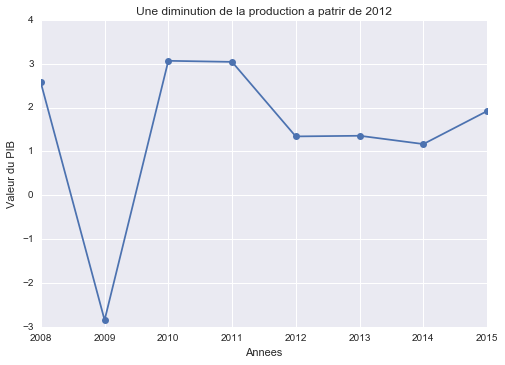

In [64]:
#plot
plt.plot(annees_DT,valeurs.tolist(), 'o-')
plt.xlabel('Annees')
plt.ylabel('Valeur du PIB')
plt.title("Une diminution de la production de richesse a patrir de 2012")
plt.show()

** 1.2 Quels sont les modèles de voitures les plus vendues (top 3) en France ces dernières années ? **

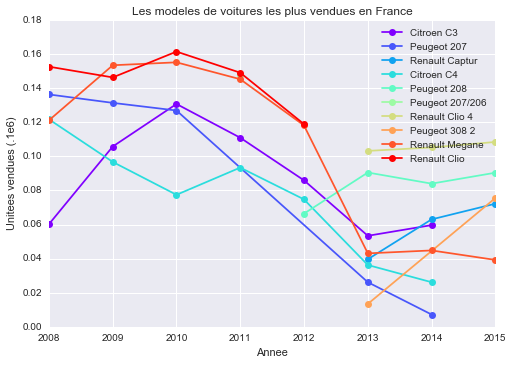

In [65]:
##
# Quels sont les modeles de voitures les plus vendues en france au cours des années?
##

#recherche du top 3 des modèles pour chaque année
voitures = []
for y in range(2008,2016):
    max_y = df[df['annee'] == str(y)].vente.nlargest(3).tolist()
    v = [df[df['vente'] == x].modele.tolist() for x in max_y]
    voitures.append(v)
#unlist
v = [val[0] for sublist in voitures for val in sublist]
#plot
color=iter(cm.rainbow(np.linspace(0,1,len(set(v)))))
for mod in set(v):
    plt.plot_date(df[df['modele'] == mod].annee,df[df['modele'] == mod].vente/1e6, '-o', label=mod, color=next(color))
plt.legend(loc='best')
plt.title('Les modeles de voitures les plus vendues en France')
plt.xlabel('Annee')
plt.ylabel('Unitees vendues (.1e6)')
plt.show()